## Problem Statement 

#### Perform sentimental analysis on the Elon-musk tweets (Elon_musk.csv)

### Import all the required libraries

In [4]:
import pandas as pd
import numpy as np 
import string 
import spacy 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [5]:
musk = pd.read_csv('Elon_musk.csv',
                   encoding='latin',
                   error_bad_lines = False)
musk

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
musk=musk['Text']
musk

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [7]:
# remove both the leading and the trailing characters
musk = [y.strip() for y in musk]
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [8]:
# removes empty strings, because they are considered in Python as False
musk = [x for x in musk if x] 
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [9]:
# Joining the list into one string/text
text = ' '.join(musk)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [10]:
#Punctuation
no_punc_text = text.translate(str.maketrans("\x92", "'", string.punctuation)) 
no_punc_text

"kunalb11 I'm an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It's getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [15]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(no_punc_text)
text_tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kumbhar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['kunalb11',
 'I',
 "'m",
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',

In [16]:
text_tokens[0:72]

['kunalb11',
 'I',
 "'m",
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed']

In [17]:
len(text_tokens)

21373

In [20]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kumbhar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:65])

['kunalb11', 'I', "'m", 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just']


In [23]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:45])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy']


In [24]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would']


In [28]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [29]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 I 'm alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought


In [30]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:22])

['kunalb11', 'I', "'", 'm', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations']


## Feature Extraction :

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [32]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

,kunalb11,alien,idaacarmack,ray,trace,cyberpunk,hdr,nextlevel,have,try,...,dire,priority,surreal,propaganda,social,httpstcowjrzibkh1h,click,samwise,gamgee,altho
0,2695,231,2433,3615,4493,959,1670,3150,1665,4528,...,1075,3504,4248,3540,4031,2325,773,3816,1525,247


In [33]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

,0
kunalb11,2695
alien,231
idaacarmack,2433
ray,3615
trace,4493
...,...
httpstcowjrzibkh1h,2325
click,773
samwise,3816
gamgee,1525


In [34]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(30)

,0
ðogecoin,4964
zzcool,4963
zwiebelbach,4962
zubinanary,4961
zshauladventure,4960
zone,4959
zon,4958
zogfotpik,4957
zip2,4956
zikryzamir,4955


In [35]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

,0
005,0
10,1
100,2
1000,3
10000,4
107,5
10x,6
11,7
112,8
11thhour,9


In [36]:
print(vectorizer.vocabulary_)

{'kunalb11': 2695, 'alien': 231, 'idaacarmack': 2433, 'ray': 3615, 'trace': 4493, 'cyberpunk': 959, 'hdr': 1670, 'nextlevel': 3150, 'have': 1665, 'try': 4528, 'joerogan': 2615, 'spotify': 4111, 'great': 1604, 'interview': 2544, 'gtera27': 1623, 'doge': 1110, 'underestimate': 4661, 'teslacn': 4338, 'congratulations': 855, 'tesla': 4332, 'china': 739, 'amazing': 257, 'execution': 1320, 'last': 2715, 'year': 4932, 'now': 3190, 'next': 3149, 'even': 1292, 'happy': 1652, 'new': 3146, 'ox': 3307, 'httpstco9wfkmyu2oj': 1860, 'frodo': 1489, 'underdoge': 4660, 'all': 234, 'thought': 4417, 'would': 4907, 'fail': 1356, 'himself': 1716, 'httpstcozgxjfdzzrm': 2393, 'owensparks': 3304, 'flcnhvy': 1430, 'anonyx10': 286, 'haha': 1637, 'thanks': 4376, 'indeed': 2482, 'tweets': 4551, 'definitely': 1014, 'represent': 3699, 'realworld': 3641, 'time': 4436, 'allocation': 236, 'the': 4383, 'entertaining': 1248, 'outcome': 3284, 'likely': 2776, 'givedirectly': 1574, 'just': 2642, 'send': 3884, 'agree': 200, 

In [37]:
print(vectorizer.get_feature_names()[50:100])

['23', '230', '24', '240am', '247teslanew', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewe', '4680', '479000', '48', '4d', '4th']


In [38]:
print(X.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
print(X.toarray().shape)

(16023, 4965)


### Let's see how can bigrams and trigrams can be included here

In [40]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,4),
                                         max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(musk)
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [41]:
print(vectorizer_ngram_range.get_feature_names())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']


In [42]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### TFidf vectorizer :

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="",
                                                 analyzer='word',
                                                 ngram_range=(1,4),
                                                 max_features = 100)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(musk)

In [44]:
print(vectorizer_n_gram_max_features.get_feature_names())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']


In [45]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         4.07911388]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### Generate wordcloud :

In [46]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    
    
    plt.figure(figsize=(60, 40))    # Set figure size

    
    plt.imshow(wordcloud)           # Display image
    
    
    plt.axis("off")                 # No axis details

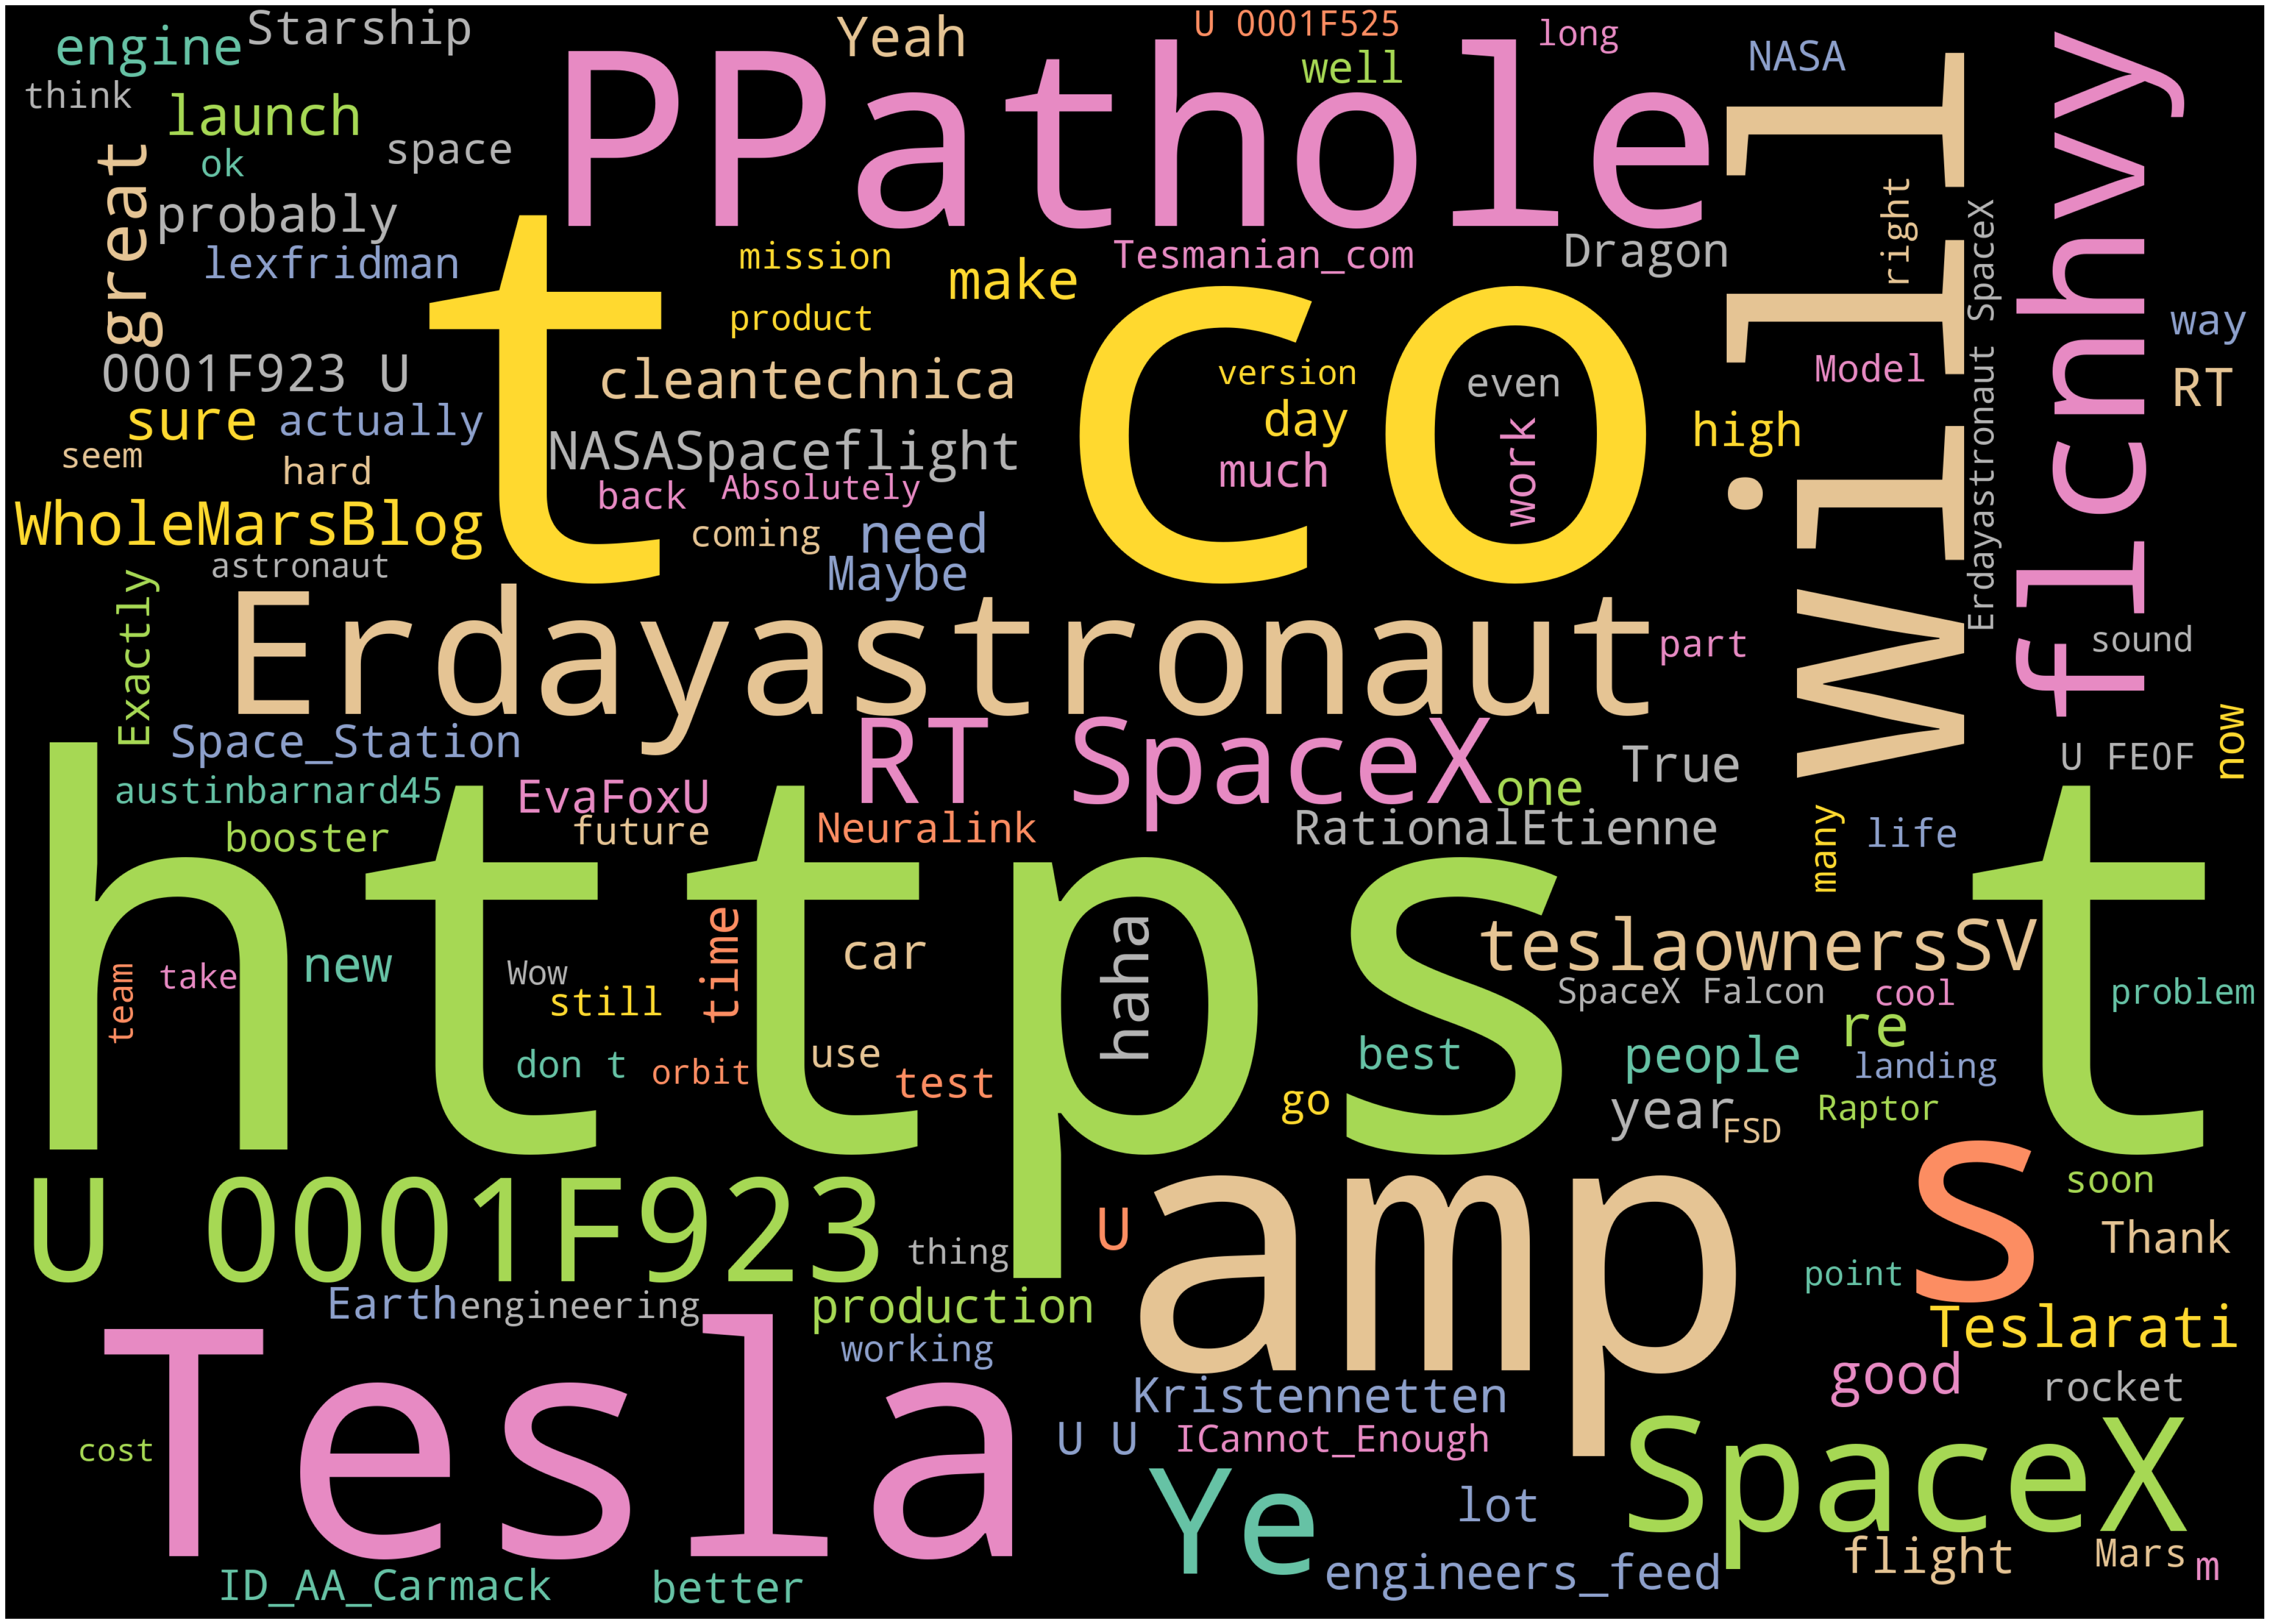

In [47]:
# Generate wordcloud
wordcloud = WordCloud(width = 3500, 
                      height = 2500,
                      background_color='black',
                      max_words=120,
                      colormap='Set2').generate(text)
# Plot
plot_cloud(wordcloud)

In [48]:
musk2 = pd.read_csv('Elon_musk.csv', encoding='latin', error_bad_lines = False)
musk2

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [49]:
musk2 = musk2['Text']
musk2

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [50]:
musk2 = [x.strip() for x in musk2] # remove both the leading and the trailing characters
musk2 = [x for x in musk2 if x] # removes empty strings, because they are considered in Python as False
musk2[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [51]:
one_block = musk2[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [52]:
one_block

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [53]:
for token in doc_block[:]:
    print(token, token.pos_)

@ID_AA_Carmack ADV
Ray PROPN
tracing VERB
on ADP
Cyberpunk PROPN
with ADP
HDR PROPN
is AUX
next ADJ
- PUNCT
level NOUN
. PUNCT
Have AUX
you PRON
tried VERB
it PRON
? PUNCT


In [54]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

#print(nouns_verbs[5:25])
nouns_verbs

['tracing', 'level', 'tried']

In [55]:
len(nouns_verbs)

3

In [56]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [57]:
X.shape

(3, 3)

In [58]:
X.toarray()

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int64)

In [59]:
cv.get_feature_names()

['level', 'tracing', 'tried']

In [60]:
#pd.DataFrame(X.toarray(), columns = sorted(cv.vocabulary_))
# Or
temp_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
temp_df

,level,tracing,tried
0,0,1,0
1,1,0,0
2,0,0,1


In [61]:
sum_words = X.sum(axis=0) #Column total
sum_words

matrix([[1, 1, 1]], dtype=int64)

In [62]:
type(sum_words)

numpy.matrix

In [63]:
cv.vocabulary_

{'tracing': 1, 'level': 0, 'tried': 2}

In [64]:
sorted(cv.vocabulary_)

['level', 'tracing', 'tried']

In [65]:
wf_df = pd.DataFrame({'word' : cv.get_feature_names(),
                      'count' : np.array(sum_words).flatten()})
wf_df

,word,count
0,level,1
1,tracing,1
2,tried,1


### Visualizing results :

<AxesSubplot: title={'center': 'Top verbs and nouns'}, xlabel='word'>

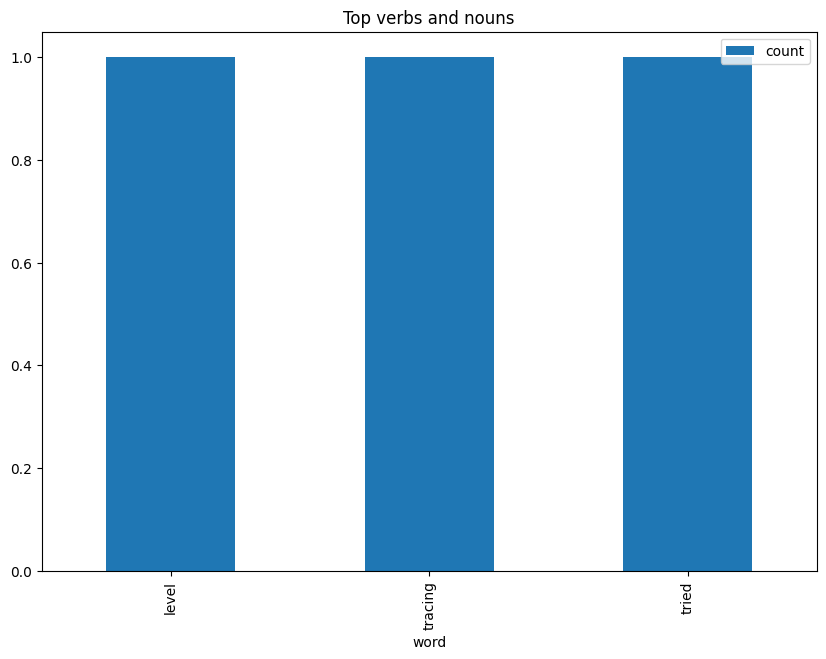

In [66]:
#Barchart for top 10 nouns + verbs
wf_df[0:15].plot.bar(x='word', figsize=(10,7), title='Top verbs and nouns')

#### Emotion Mining :

In [68]:
# PW for positive words 
# NW for Negative Words 

In [70]:
PW=pd.read_csv('positive-words.txt', 
               error_bad_lines = False)
PW

Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
...,...
2026,youthful
2027,zeal
2028,zenith
2029,zest


In [71]:
NW=pd.read_csv('negative-words.txt', 
               error_bad_lines = False,
               encoding='latin-1')
NW

Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [72]:
PW =PW.iloc[25:]
PW =PW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
PW.reset_index(inplace=True)
PW =PW.drop('index',axis=1)
PW['Score'] = 1
PW

,Words,Score
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


In [73]:
NW = NW.iloc[25:]
NW = NW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
NW.reset_index(inplace=True)
NW = NW.drop('index',axis=1)
NW['Score'] = -1
NW

,Words,Score
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [74]:
affinity_scores1 = PW.set_index('Words')['Score'].to_dict()
affinity_scores2 = NW.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores = affinity_scores1
affinity_scores

{'a+': 1,
 'abound': 1,
 'abounds': 1,
 'abundance': 1,
 'abundant': 1,
 'accessable': 1,
 'accessible': 1,
 'acclaim': 1,
 'acclaimed': 1,
 'acclamation': 1,
 'accolade': 1,
 'accolades': 1,
 'accommodative': 1,
 'accomodative': 1,
 'accomplish': 1,
 'accomplished': 1,
 'accomplishment': 1,
 'accomplishments': 1,
 'accurate': 1,
 'accurately': 1,
 'achievable': 1,
 'achievement': 1,
 'achievements': 1,
 'achievible': 1,
 'acumen': 1,
 'adaptable': 1,
 'adaptive': 1,
 'adequate': 1,
 'adjustable': 1,
 'admirable': 1,
 'admirably': 1,
 'admiration': 1,
 'admire': 1,
 'admirer': 1,
 'admiring': 1,
 'admiringly': 1,
 'adorable': 1,
 'adore': 1,
 'adored': 1,
 'adorer': 1,
 'adoring': 1,
 'adoringly': 1,
 'adroit': 1,
 'adroitly': 1,
 'adulate': 1,
 'adulation': 1,
 'adulatory': 1,
 'advanced': 1,
 'advantage': 1,
 'advantageous': 1,
 'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable'

In [75]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [124]:
df_em=pd.read_csv('Elon_musk.csv',encoding='windows-1254')
df_em.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [125]:
#droping the unnamed column as it is not usefull for fure prediction:-
df_em=df_em.drop('Unnamed: 0',axis=1)

In [126]:
#finding both null and datatype values
df_em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [127]:
#importing regular expression to perform cleaningin the text
import re
import string

#defineing the function to perform cleaning the unwanted things from text
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

#calling the function
clean = lambda x: clean_text(x)


In [128]:
#applying the clean for text
df_em['Text'] = df_em.Text.apply(clean)
df_em.Text

0                                             im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: Text, Length: 1999, dtype: object

In [129]:
#importing textblob
from textblob import TextBlob

#defining the function named as sentimental analysis and finding polarity by performing sentimental analysis
def sentiment_analysis(ds):
    sentiment = TextBlob(ds['Text']).sentiment
    return pd.Series([sentiment.polarity])

#creating the new column named as polarity
df_em['polarity']=df_em.apply(sentiment_analysis,axis=1)
df_em

,Text,polarity
0,im an alien,-0.250000
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000000
2,joerogan spotify great interview,0.800000
3,doge is underestimated,0.000000
4,teslacn congratulations tesla china for amazin...,0.275000
...,...,...
1994,flcnhvy true it sounds so surreal but the nega...,0.111111
1995,ppathole make sure to read ur terms amp condit...,0.500000
1996,teslagong ppathole samwise gamgee,0.000000
1997,ppathole altho dumb and dumber is,-0.375000


In [130]:
#defining the function named as score analysis,here based on polarity finding the reviews
def analysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

#creating the new column by applying on function on polarity
df_em['review'] = df_em['polarity'].apply(analysis)

In [131]:
#Word frequency
freq = pd.Series(' '.join(df_em['Text']).split()).value_counts()[:20] # for top 20
freq

the               487
to                400
a                 356
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                138
we                136
on                129
that              128
rt                127
but               126
dtype: int64

In [132]:
#reading the stop words using pandas
stopwords=pd.read_csv('stop.txt')

In [133]:
#applying the stopwords for text and segrigating them
df_em['Text'] = df_em['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

In [134]:
#while importing the stop words i have missed 'a'
df_em['Text'] = df_em['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in 'a'))

In [135]:
freq_Sw = pd.Series(' '.join(df_em['Text']).split()).value_counts() # for top 20
freq_Sw

the         487
to          400
is          355
of          315
spacex      239
           ... 
nyquil        1
musk          1
negati        1
carousel      1
altho         1
Length: 4604, dtype: int64

In [136]:
df_em.head()

,Text,polarity,review
0,im an alien,-0.250,negative
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000,neutral
2,joerogan spotify great interview,0.800,positive
3,doge is underestimated,0.000,neutral
4,teslacn congratulations tesla china for amazin...,0.275,positive


In [137]:
#finding the types of review present in datasets by using unique
df_em['review'].unique()

array(['negative', 'neutral', 'positive'], dtype=object)

In [138]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 5)
X = vectorizer.fit_transform(df_em["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

In [139]:
#based on occurence distributing the frequency
word_freq_df.head()

,term,occurrences,frequency
0,aber,1,0.000157
1,abo,1,0.000157
2,aboard,1,0.000157
3,abort,3,0.000472
4,above,5,0.000787


In [140]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(df_em["Text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
data = pd.DataFrame(denselist, columns = names_features)

In [141]:
data.head()

,able,abort,absolutely,absurd,access,accurate,actual,actually,adamklotz,add,...,years,yes,yesterdays,youre,yourfavgas,youve,yup,zero,zeroes,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [143]:
top2_words = get_top_n2_words(df_em['Text'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(10)

,Bi-gram,Freq
0,rt spacex,71
1,will be,51
2,of the,47
3,this is,36
4,in the,36
5,to the,28
6,to be,28
7,is the,24
8,should be,22
9,on the,19


In [144]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [145]:
top3_words = get_top_n3_words(df_em["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [146]:
top3_df.head()

,Tri-gram,Freq
0,rt spacex falcon,16
1,falcon first stage,9
2,to the spacestation,9
3,it will be,8
4,spacex falcon first,8


In [147]:
# Applying naive bayes for classification

In [148]:
df_em.head()

,Text,polarity,review
0,im an alien,-0.250,negative
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000,neutral
2,joerogan spotify great interview,0.800,positive
3,doge is underestimated,0.000,neutral
4,teslacn congratulations tesla china for amazin...,0.275,positive


In [149]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [150]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Kumbhar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [151]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [152]:
sentiments_using_SIA = df_em.Text.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Text
pos,1760
neg,239


In [153]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(df_em.Text[3])

{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'compound': -0.2732}

In [154]:
df_em['tweet'] = df_em['Text']
df_em['scores'] = df_em['Text'].apply(lambda review: sid.polarity_scores(review))
df_em.head()

,Text,polarity,review,tweet,scores
0,im an alien,-0.250,negative,im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000,neutral,idaacarmack ray tracing on cyberpunk with hdr ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,joerogan spotify great interview,0.800,positive,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp..."
3,doge is underestimated,0.000,neutral,doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp..."
4,teslacn congratulations tesla china for amazin...,0.275,positive,teslacn congratulations tesla china for amazin...,"{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp..."


In [155]:
df_em=df_em.drop(['Text','polarity','review'],axis=1)

In [156]:
df_em.head()

,tweet,scores
0,im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,idaacarmack ray tracing on cyberpunk with hdr ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp..."
3,doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp..."
4,teslacn congratulations tesla china for amazin...,"{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp..."


In [157]:
df_em['compound']  = df_em['scores'].apply(lambda scores: scores['compound'])
df_em.head()

,tweet,scores,compound
0,im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,idaacarmack ray tracing on cyberpunk with hdr ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249
3,doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732
4,teslacn congratulations tesla china for amazin...,"{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp...",0.8271


In [158]:
df_em['sentiment'] = df_em['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df_em.head()

,tweet,scores,compound,sentiment
0,im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,idaacarmack ray tracing on cyberpunk with hdr ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,Positive
3,doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,Negative
4,teslacn congratulations tesla china for amazin...,"{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp...",0.8271,Positive


In [159]:
temp = df_em.groupby('sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
temp

,sentiment,tweet
1,Neutral,894
2,Positive,871
0,Negative,234


<AxesSubplot: xlabel='sentiment', ylabel='count'>

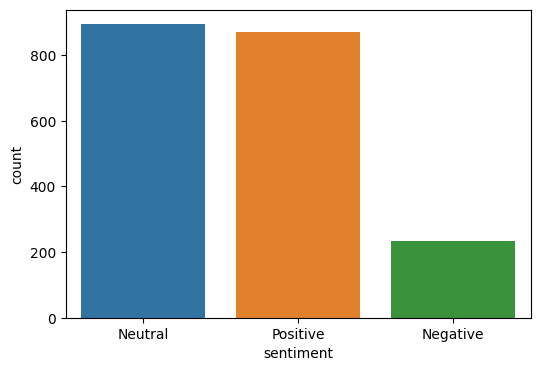

In [160]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment',data=df_em)

In [161]:
def split_into_words(i):
    return (i.split(" "))

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_em.iloc[:,0],df_em.iloc[:,-1],test_size=0.2,random_state=42)

In [163]:
X_test

256                                   connectdotstoo sure
352     flcnhvy ercxspace saves mass amp cost of legs ...
298                 techreview and increase fun hopefully
581                               xhnews exciting mission
1288    flcnhvy gary the snail is still winning but we...
                              ...                        
650     nichegamer there is such thing as too much sen...
1973                                  optimoprincipi spqr
261     arstechnica sciguyspace were just trying to ge...
1305    starship with flaps amp nosecone should be don...
966     the gauntlet has been thrown down the prophecy...
Name: tweet, Length: 400, dtype: object

In [164]:
# Preparing email texts into word count matrix format 
tweet= CountVectorizer(analyzer=split_into_words).fit(df_em.tweet)

In [165]:
all_tweet_matrix = tweet.transform(df_em.tweet)
all_tweet_matrix.shape 

(1999, 4605)

In [166]:
#For training messages
train_tweet_matrix = tweet.transform(X_train)
train_tweet_matrix.shape 

#For testing messages
test_tweet_matrix = tweet.transform(X_test)
test_tweet_matrix.shape 

(400, 4605)

In [167]:
from sklearn.naive_bayes import MultinomialNB as MB
# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tweet_matrix,y_train)

test_pred_m = classifier_mb.predict(test_tweet_matrix)
accuracy_test_m = np.mean(test_pred_m==y_test) 
print('Testing Accuracy of Model :',accuracy_test_m)

Testing Accuracy of Model : 0.7075
